# PISA 2012 Explanatory Data Analysis
## by Adrien Funel

## Investigation Overview

In this investigation, we will look into the relationships between study time spent on homeworks and the reading skills of the students. More precisely, we would like to understand which features are favouring the study time to be transformed in success.

## Dataset Overview

The PISA study dataset record features about students across the world from different educational systems. More specifically, it looks at their level of preparation for life beyond school. It also provides features about the students background and attitude toward learning.
The records are made of information from about 510,000 students in 65 economies and the assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [2]:
df_sub = pd.read_csv('pisa_sub.csv')
df_sub.head(5)

,country,OECD,student_id,gender,truancy,lang_home,time_homework,time_parents,time_computer,home_desktop,home_laptop,home_tablet,math_concepts,edu_lvl_parents,math_interest,perseverance,learning_time_sci,perf_math,perf_read,perf_sci
0,Albania,Non-OECD,1,Female,None,Language of the test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"ISCED 3A, ISCED 4",0.91,-0.3407,NaN,406.8469,249.5762,341.7009
1,Albania,Non-OECD,2,Female,None,Language of the test,NaN,0.0,2.0,NaN,NaN,NaN,0.6387,"ISCED 5A, 6",0.00,1.3116,90.0,486.1427,406.2936,548.9929
2,Albania,Non-OECD,3,Female,None,Language of the test,NaN,2.0,3.0,NaN,NaN,NaN,0.8215,"ISCED 5A, 6",1.23,0.9918,NaN,533.2684,401.2100,499.6643
3,Albania,Non-OECD,4,Female,None,Language of the test,10.0,0.0,3.0,NaN,NaN,NaN,0.7266,"ISCED 5A, 6",NaN,NaN,90.0,412.2215,547.3630,438.6796
4,Albania,Non-OECD,5,Female,None,Language of the test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"ISCED 3A, ISCED 4",0.30,1.0819,NaN,381.9209,311.7707,361.5628


## Distribution of the study time spent on homeworks

Study time dedicated to homework is skewed on the left. concentrated between 0 and 5. It has a long tail with observed study time up to 30h a week.
Next we should observe if the study time is correlated with good results.

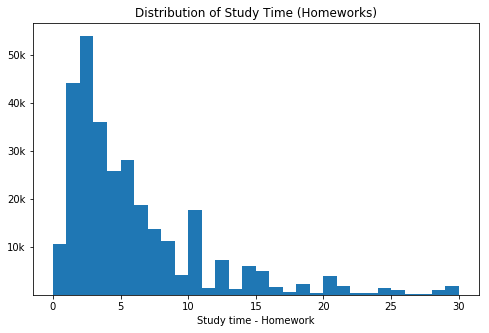

In [3]:
binsize = 1
bins = np.arange(0, df_sub.time_homework.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=df_sub, x='time_homework', bins=bins)
plt.title('Distribution of Study Time (Homeworks)')
plt.xlabel('Study time - Homework')
plt.yticks([10000, 20000, 30000, 40000, 50000], ['10k', '20k', '30k', '40k', '50k'])
plt.show()

## Reading performance  by parent's level of education

We can see how the parent's education level is related to the time spent on homeworks and the reading performance of the children. Specifically, there is a clear effect on the children whose parents are holding a Master / Doctorat. They get better results in reading on average and the higher quartile is spending more time on homeworks than any other category. 

In [4]:
def read_per_soc(var, color):
    fig, ax = plt.subplots(nrows= 2,figsize = [10,8], sharex=True)
    order = ['ISCED 1', 'ISCED 2', 'ISCED 3B, C', 'ISCED 3A, ISCED 4','ISCED 5B', 'ISCED 5A, 6']
    ticks = ['Primary', 'Lower secondary', 'Upper secondary', 'Post-secondary non-tertiary','Tertiary', 'Master / Doctoral']
    
    sb.violinplot(data = df_sub, x = var, y = 'perf_read', order= order, color=color, ax = ax[0], inner = 'quartile')
    ax[0].set_ylim([150, 910])
    ax[0].set_ylabel('Reading Performance')
    ax[0].set_xlabel('')
        
    
    
    sb.violinplot(data = df_sub, x = var, y = 'time_homework', order= order, color=color, ax = ax[1], inner = 'quartile')
    ax[1].set_ylim([0, 12])
    ax[1].set_xticklabels(ticks)
    ax[1].set_xlabel('Parents higher level of Education')
    ax[1].set_ylabel('Homeworks time (h)')
    plt.xticks(rotation=30)
    
    fig.suptitle('Reading Performance and Time spent on Homeworks by Parents higher level of Education')
    plt.show()

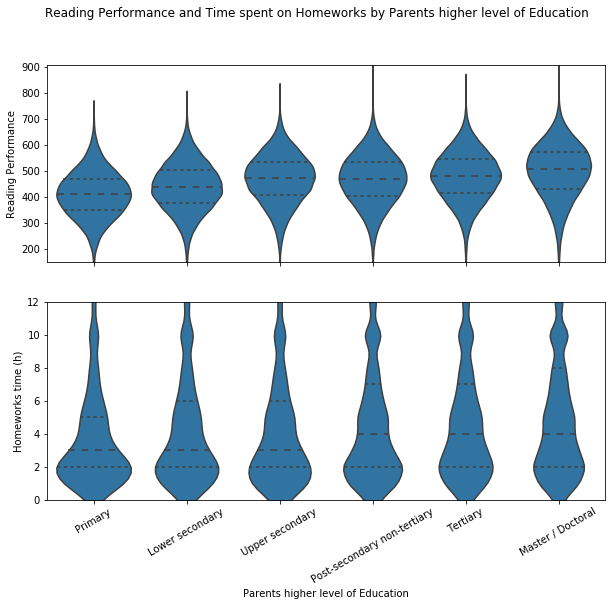

In [5]:
read_per_soc('edu_lvl_parents', sb.color_palette()[0])

## Reading Performance by Time spent on Homeworks and Language spoken at Home

We observe a strong correlation of similar intensity between the hours spent on homeworks and the reading performance of the students from both groups (speaking the same language at home than the language of the test and speaking a different language). This reveals that regardless of the language you speak at home, your dedication to homeworks pays back the same way. The only different iis that students speaking a different language at home will have lower results on average for the same number of hours spent on homeworks.

There is a sharp decrease in the efficiency of hours spent on homeworks above 28 hours a week, suggesting than on average it is proven counter-productive to work above that limit.

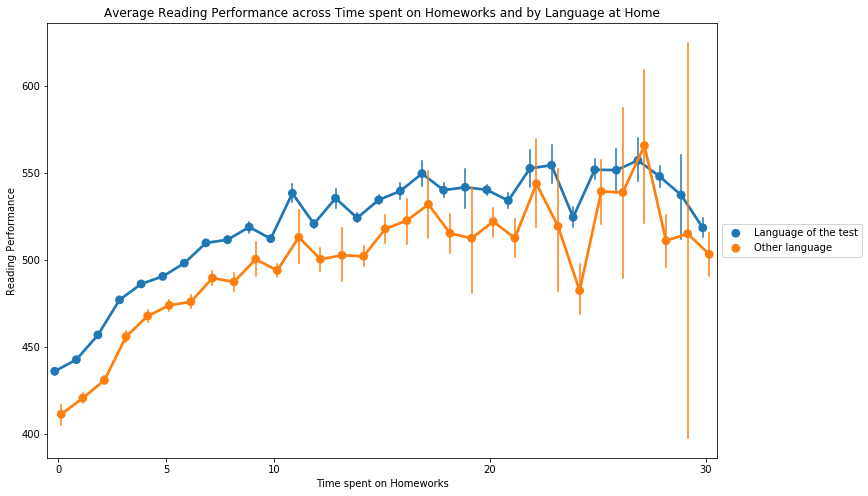

In [6]:
plt.figure(figsize=[12,8])
ax = sb.pointplot(data = df_sub, x = 'time_homework', y = 'perf_read', hue = 'lang_home',
                  dodge = 0.3, errwidth=1.5)
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) 
plt.xticks([0, 5, 10, 20, 30],['0', '5', '10', '20', '30'])
plt.xlabel('Time spent on Homeworks')
plt.ylabel('Reading Performance')
plt.title('Average Reading Performance across Time spent on Homeworks and by Language at Home')
plt.show()

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!